In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For better chart display
sns.set(style="whitegrid")


I import pandas for data manipulation, and matplotlib & seaborn for visualization. These are standard tools for exploratory data analysis (EDA).

In [4]:
# Load the Excel file
file_path = "Data Analysis Exercise -- Template.xlsx"
df = pd.read_excel(file_path, sheet_name="Data")

# Display the first few rows
df.head()


,Level,Name,Excitable,Skeptical,Cautious,Reserved,Leisurely,Bold,Mischievous,Colorful,Imaginative,Diligent,Dutiful
0,N-1,Exec1,66,29,18,55,35,76,72,26,57,45,21
1,N-1,Exec2,84,96,62,40,89,28,11,44,81,67,18
2,N-1,Exec3,90,23,72,34,13,61,45,8,92,19,13
3,N-1,Exec4,71,88,98,30,97,42,67,6,42,1,9
4,N-1,Exec5,96,33,27,42,87,44,38,35,56,10,2


I read the Excel file and inspect the first few rows to understand the structure. The key columns are:

Level (N-1 or N-2)

Name (executive name)

11 Hogan personality traits (each scored from 1 to 100)

In [8]:
# Split the dataset based on executive level
df_n1 = df[df["Level"] == "N-1"]
df_n2 = df[df["Level"] == "N-2"]


I separate executives into two groups:

N-1: Direct reports to the CEO

N-2: Reports of N-1s

This will help us compute and compare scores for both groups.

In [11]:
# Extract trait columns (exclude Level and Name)
trait_cols = [col for col in df.columns if col not in ["Level", "Name"]]
trait_cols


['Excitable',
 'Skeptical',
 'Cautious',
 'Reserved',
 'Leisurely',
 'Bold',
 'Mischievous',
 'Colorful',
 'Imaginative',
 'Diligent',
 'Dutiful']

I isolate the 11 HDS traits to use in calculations. These columns represent different risk areas when executives are under stress.

In [15]:
# Calculate mean trait scores for each group
n1_avg = df_n1[trait_cols].mean()
n2_avg = df_n2[trait_cols].mean()

# Combine into one DataFrame
comparison = pd.DataFrame({
    "N-1 Avg Score": n1_avg,
    "N-2 Avg Score": n2_avg,
    "Difference (N1 - N2)": n1_avg - n2_avg
}).sort_values(by="N-1 Avg Score", ascending=False)

comparison


,N-1 Avg Score,N-2 Avg Score,Difference (N1 - N2)
Excitable,79.857143,51.000000,28.857143
Imaginative,70.285714,55.555556,14.730159
Leisurely,69.142857,50.888889,18.253968
Bold,62.428571,59.555556,2.873016
Skeptical,49.142857,60.000000,-10.857143
Cautious,48.142857,55.222222,-7.079365
Reserved,43.000000,47.888889,-4.888889
Mischievous,37.857143,39.444444,-1.587302
Diligent,30.142857,46.222222,-16.079365
Dutiful,27.000000,61.000000,-34.000000


I compute average trait scores for each group and create a comparison table. The difference column helps us understand which traits are more dominant in which group.

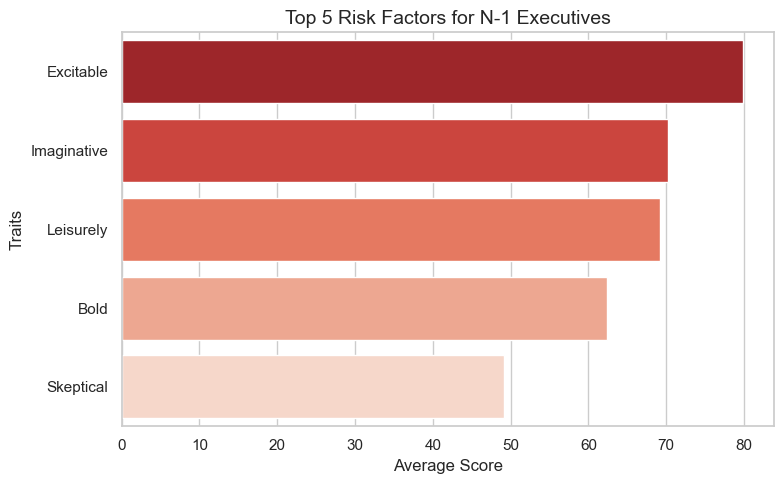

In [29]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Top 5 traits in N-1 team
top5_n1 = n1_avg.sort_values(ascending=False).head(5)

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x=top5_n1.values, y=top5_n1.index, palette="Reds_r")
plt.title("Top 5 Risk Factors for N-1 Executives", fontsize=14)
plt.xlabel("Average Score")
plt.ylabel("Traits")
plt.tight_layout()
plt.show()


This bar chart shows the traits where N-1 executives score highest. These are their biggest risk areas under stress

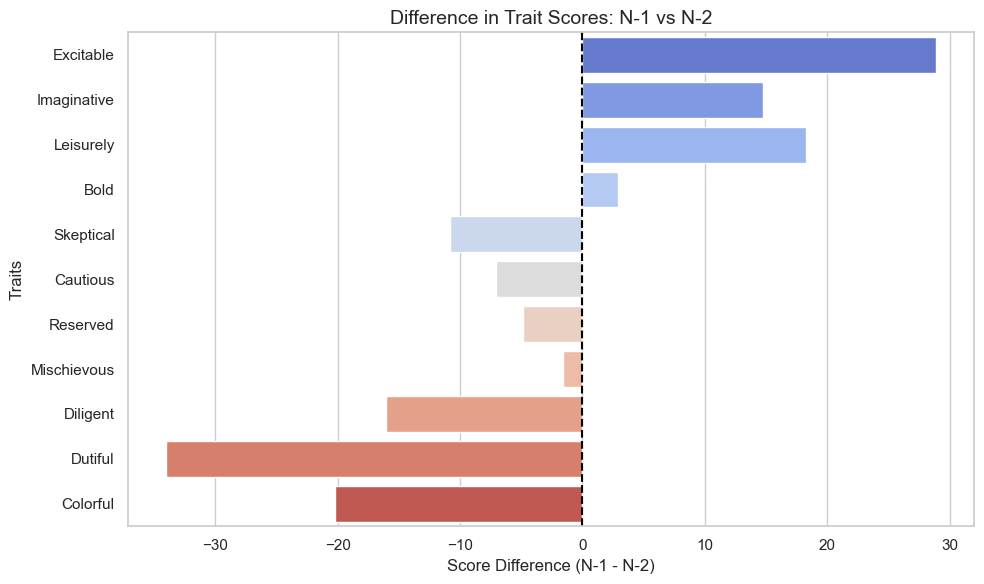

In [35]:
# Plot difference between N-1 and N-2
plt.figure(figsize=(10, 6))
sns.barplot(x=comparison["Difference (N1 - N2)"], y=comparison.index, palette="coolwarm")
plt.axvline(0, color="black", linestyle="--")
plt.title("Difference in Trait Scores: N-1 vs N-2", fontsize=14)
plt.xlabel("Score Difference (N-1 - N-2)")
plt.ylabel("Traits")
plt.tight_layout()
plt.show()


This plot shows how each trait differs between the two teams:

Positive bars → N-1 scores higher (more at risk)

Negative bars → N-2 scores higher (more at risk)

This helps uncover how leadership styles and stress responses differ.

In [42]:
# Top risk traits for N-1
print("🔺 Major Risk Traits for N-1:")
print(n1_avg.sort_values(ascending=False).head(5), "\n")

# Traits with biggest differences
print("⚖️ Traits with Largest Differences Between N-1 and N-2:", "\n")
print(comparison["Difference (N1 - N2)"].sort_values(ascending=False).head(3), "\n")
print(comparison["Difference (N1 - N2)"].sort_values().head(3))


🔺 Major Risk Traits for N-1:
Excitable      79.857143
Imaginative    70.285714
Leisurely      69.142857
Bold           62.428571
Skeptical      49.142857
dtype: float64 

⚖️ Traits with Largest Differences Between N-1 and N-2: 

Excitable      28.857143
Leisurely      18.253968
Imaginative    14.730159
Name: Difference (N1 - N2), dtype: float64 

Dutiful    -34.000000
Colorful   -20.190476
Diligent   -16.079365
Name: Difference (N1 - N2), dtype: float64


1. What are the major risk factors for the N-1 team?

Based on average HDS scores, the N-1 executives show high risk in the following derailers:

Excitable (79.9): Prone to emotional volatility, frustration, and mood swings under stress.

Imaginative (70.3): May become overly creative, eccentric, or detached from practical realities.

Leisurely (69.1): Appear agreeable but may resist direction and become passive-aggressive.

Bold (62.4): May exhibit overconfidence, arrogance, or disregard for feedback.

🔎 Implication: The N-1 team is visionary and assertive but may struggle with emotional regulation and structured follow-through during high-pressure situations.

2. In what ways do the two teams differ significantly?
 
 Key Differences:
| Trait         | N-1 Avg | N-2 Avg | Difference |
| ------------- | ------- | ------- | ---------- |
| **Excitable** | 79.9    | 51.0    | +28.9      |
| **Leisurely** | 69.1    | 50.9    | +18.3      |
| **Dutiful**   | 27.0    | 61.0    | −34.0      |
| **Diligent**  | 30.1    | 46.2    | −16.1      |
| **Skeptical** | 49.1    | 60.0    | −10.9      |


Interpretation:
N-1 team is more emotionally reactive, imaginative, and likely to resist structure.

N-2 team is more dutiful, diligent, and cautious—they value rules, accountability, and precision.

Collaboration Potential:
Strengths: N-1 offers bold ideas and innovation; N-2 brings stability and execution.

Tensions: N-1 may see N-2 as rigid; N-2 may find N-1 inconsistent or unpredictable.

Solution: Clear communication protocols and shared decision frameworks can bridge these style gaps.

3. How is the N-2 team most similar? How is it most different?

Most Similar Traits:
| Trait       | Score Difference (N1 - N2) |
| ----------- | -------------------------- |
| Mischievous | −1.6                       |
| Bold        | +2.9                       |


Both groups share similar tendencies in being persuasive, risk-tolerant, and assertive, suggesting shared leadership behaviors like taking charge and challenging norms.


Most Different Traits:

| Trait         | Score Difference |
| ------------- | ---------------- |
| **Dutiful**   | −34.0            |
| **Excitable** | +28.9            |
| **Diligent**  | −16.1            |

Implications:

N-2 team is significantly more structured, compliant, and emotionally stable.

May be better suited for roles requiring consistency, process, and reliability.

Succession planning should account for training N-1s in emotional regulation and improving N-2's risk-taking and visioning.
